/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=3b7d5cabd8c3df76e3d376ffa1353a29b1a2deadbe04a67a1296aa426f749792
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
['Aspergillus niger', 'Trichophyton rubrum', 'Epidermophyton floccosum', 'Candida albicans', 'Trichophyton mentagrophytes']
(512, 512, 3)
Training Dataset: 
Found 7291 images belonging to 5 classes.
Testing Dataset: 
Found 1823 images belonging to 5 classes.
Training model: EfficientNetB0
16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (Non

2023-08-16 19:21:09.219372: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


596/596 [==============================] - 74s 70ms/step - loss: 0.9194 - accuracy: 0.6317 - val_loss: 0.9470 - val_accuracy: 0.5753
Epoch 2/32
596/596 [==============================] - 40s 67ms/step - loss: 0.6990 - accuracy: 0.7292 - val_loss: 0.7056 - val_accuracy: 0.7420
Epoch 3/32
596/596 [==============================] - 39s 65ms/step - loss: 0.5901 - accuracy: 0.7708 - val_loss: 0.6011 - val_accuracy: 0.7646
Epoch 4/32
596/596 [==============================] - 40s 67ms/step - loss: 0.5217 - accuracy: 0.8030 - val_loss: 0.5235 - val_accuracy: 0.7917
Epoch 5/32
596/596 [==============================] - 39s 66ms/step - loss: 0.4465 - accuracy: 0.8336 - val_loss: 0.5014 - val_accuracy: 0.8121
Epoch 6/32
596/596 [==============================] - 41s 68ms/step - loss: 0.3953 - accuracy: 0.8539 - val_loss: 0.5178 - val_accuracy: 0.8012
Epoch 7/32
596/596 [==============================] - 39s 65ms/step - loss: 0.3704 - accuracy: 0.8684 - val_loss: 0.6276 - val_accuracy: 0.7792
Epo

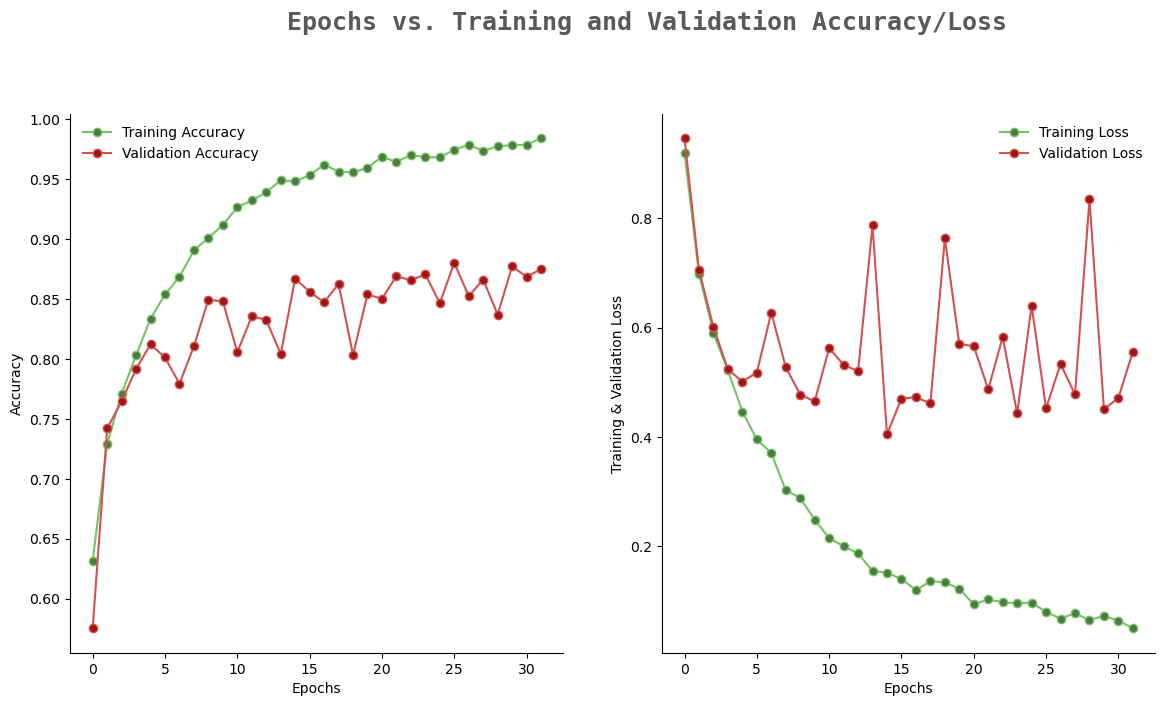

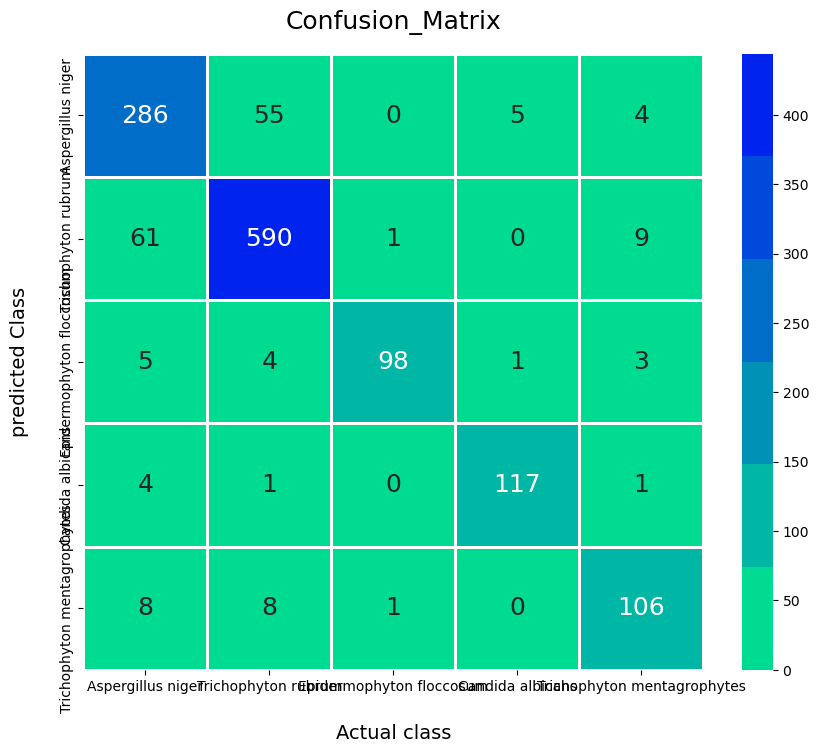

In [1]:
import cv2
import numpy as np
import pandas as pnds
import matplotlib.pyplot as plt
import time
import seaborn as sns
from os import listdir
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3,EfficientNetB7,InceptionResNetV2,MobileNetV2
from tensorflow.keras.applications import InceptionV3, ResNet50, DenseNet121,VGG16, VGG19, Xception,NASNetMobile
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow.keras.applications as keras_applications
from tensorflow.keras.layers import LSTM, Dense
import keras
from scipy import ndimage
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
#from pretty_confusion_matrix import pp_matrix
#confusion_matrix = metrics.confusion_matrix(y_true=y_test_labels, y_pred=pred_labels)  # shape=(12, 12)
from sklearn.metrics import confusion_matrix
from IPython.display import clear_output
# !pip install imutils
# clear_output()
# !pip install tf-nightly
# !pip install keras_efficientnets
# !pip install pretty-confusion-matrix
# import imutils
from IPython.display import clear_output
!pip install imutils
import warnings
# Ignore all warning messages temporarily
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
# clear_output()
# !pip install tf-nightly
# !pip install keras_efficientnets
# !pip install pretty-confusion-matrix
import imutils

colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']


def Filtering(image):
    
    gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
    median_filtered = cv2.medianBlur(image, 5)

    # Apply Emboss Filter
    emboss_kernel = np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]])
    embossed_image = cv2.filter2D(image, -1, emboss_kernel)

    # Apply Unsharp Masking
    blurred = cv2.GaussianBlur(image, (5, 5), 10.0)
    unsharp_masked = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    # Apply Sharpening Filter
    sharpening_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
    
    box_filter = cv2.boxFilter(image, -1, (5, 5))

    return gaussian_blur

    
    


# Set random seed for reproducibility
tf.random.set_seed(42)
#Added the image Category
imageCategory=[]
dataPath='/kaggle/input/defungi-microscopic-fungi-image'
for sub_folder in os.listdir(os.path.join(dataPath,'train')):
   imageCategory.append(sub_folder)
print(imageCategory)

#print the daetails of training class and testing class

imgsz=cv2.imread('/kaggle/input/defungi-microscopic-fungi-image/train/Candida albicans/H1_100a_1_076d0b797029423a9aa8a03ebccd1e1a.jpg')
imgsz=imgsz.shape
print(imgsz)

imageGenerator=ImageDataGenerator()
print("Training Dataset: ")
trainDataset=imageGenerator.flow_from_directory('/kaggle/input/defungi-microscopic-fungi-image/train')
print("Testing Dataset: ")
testDataset=imageGenerator.flow_from_directory('/kaggle/input/defungi-microscopic-fungi-image/test')


trainDataset.class_indices
trainImageCount=pnds.DataFrame(trainDataset.classes)
trainImageCount.value_counts()

testImageCount=pnds.DataFrame(testDataset.classes)
testImageCount.value_counts()


X_train=[]
Y_train=[]
image_size=150  # 150 245

for i in imageCategory:
  trainPath=os.path.join(dataPath,'train',i)
  for j in os.listdir(trainPath):
    image=cv2.imread(os.path.join(trainPath,j))
#     image=Filtering(image)
    image=cv2.resize(image,(image_size,image_size))
    X_train.append(image)
    Y_train.append(i)

  testPath=os.path.join(dataPath,'test',i)
  for j in os.listdir(testPath):
    image=cv2.imread(os.path.join(testPath,j))
#     image=Filtering(image)
    image=cv2.resize(image,(image_size,image_size))
    X_train.append(image)
    Y_train.append(i)


X_train=np.array(X_train)
Y_train=np.array(Y_train)


X_train,Y_train=shuffle(X_train,Y_train,random_state=42)


# Data Augmentation

dataAugmentation=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
    )


dataAugmentation.fit(X_train)
X_train.shape

lEncdr=LabelEncoder()

X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.15,random_state=42,stratify=Y_train)
lblTrain=lEncdr.fit(Y_train)
Y_train=lEncdr.transform(Y_train)
Y_test=lEncdr.transform(Y_test)


models = {
    'EfficientNetB0':keras_applications.EfficientNetB0,
#     'GoogleNet': keras_applications.InceptionV3,
#     'Xception': keras_applications.Xception,
#     'MobileNet':keras_applications.MobileNetV2,
#     'ResNet50': keras_applications.ResNet50,
# #     'AlexNet': keras_applications.AlexNet,
#     'DenseNet121': keras_applications.DenseNet121,
# #     'VGG16': keras_applications.VGG16,
# #     'VGG19': keras_applications.VGG19,
# #     'Xception': keras_applications.Xception,
#     'NASNetMobile': keras_applications.NASNetMobile
}

history = {}
accuracies = {}
classification_reports = {}
confusion_matrices = {}

for model_name, model_fn in models.items():
    # Print current model name
    print(f"Training model: {model_name}")
    # Load the base model
    base_model = model_fn(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    # Create the model architecture
    model = tf.keras.models.Sequential()
    model.add(base_model)
#     model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(512,activation='relu',kernel_initializer='GlorotNormal'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='GlorotNormal'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))

    # Compile the model
    opt = SGD(learning_rate=0.01,momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())
    early_stopping_model=keras.callbacks.EarlyStopping(patience=9,restore_best_weights=True)
    history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=32,batch_size=13)

    print()
#     pnds.DataFrame(history.history).plot(figsize=(6,6))
#     plt.grid(True)
#     plt.gca().set_ylim(0,1)

    fig, ax = plt.subplots(1,2,figsize=(14,7))
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs_count = [i for i in range(len(train_acc))]

    fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
             fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

    sns.despine()
    ax[0].plot(epochs_count, train_acc, marker='o',markerfacecolor=colors_green[2], color=colors_green[3],label = 'Training Accuracy')
    ax[0].plot(epochs_count, val_acc, marker='o',markerfacecolor=colors_red[2], color=colors_red[3],label = 'Validation Accuracy')
    ax[0].legend(frameon=False)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')

    sns.despine()
    ax[1].plot(epochs_count, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],label='Training Loss')
    ax[1].plot(epochs_count, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],label='Validation Loss')
    ax[1].legend(frameon=False)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Training & Validation Loss')
    fig.show()

    print()
    loss,accuracy=model.evaluate(X_test,Y_test)
    print('Accuracy: %f' %(accuracy*100))
    print()
    Y_test_labels=lEncdr.inverse_transform(Y_test)
    # predict the label inversely
    prediction=np.argmax(model.predict(X_test),axis=1)
    prediction_labels=lEncdr.inverse_transform(prediction)   #prediction labels
    pnds.Series(prediction_labels).value_counts()
    print()
    confusionMatrix=confusion_matrix(Y_test,prediction)
    fig,axis=plt.subplots(figsize=(10,8))
    colorPlate=sns.color_palette("winter_r")
    sns.heatmap(confusionMatrix,annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=colorPlate)
    axis.xaxis.set_ticklabels(imageCategory)
    axis.yaxis.set_ticklabels(imageCategory)
    plt.yticks(va="center")
    plt.title("Confusion_Matrix",fontsize=18,pad=18)
    plt.xlabel("Actual class",labelpad=22,fontsize=14)
    plt.ylabel("predicted Class",labelpad=22,fontsize=14)
    print()
    print(classification_report(Y_test,prediction,target_names=imageCategory))
    print()
   
    #lt.savefig(os.path.join('/content/drive/MyDrive/Tumor_Dataset/Brain-Tumor/','confusionMatrix-crop.png'),dpi=300)